# **DNN**

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [3]:
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Covid19-dataset'
train_dir='/content/drive/MyDrive/Covid19-dataset/train'
test_dir='/content/drive/MyDrive/Covid19-dataset/test'

Mounted at /content/drive


In [4]:
# Define image dimensions and batch size
image_shape = (224, 224)
batch_size = 64

# Data augmentation and preprocessing for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting the training set into 80% training and 20% validation
)

# Preprocessing for test set
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and augment the training set
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_shape,
    batch_size=batch_size,
    class_mode='sparse',
    subset='training'  # Use the subset 'training' for the training set
)

# Load and augment the validation set
val_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_shape,
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation'  # Use the subset 'validation' for the validation set
)

# Load the test set
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_shape,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

# Define the DNN model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(image_shape[0], image_shape[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [7]:
# Train the model
history = model.fit(train_set, epochs=50, validation_data=val_set)

Epoch 1/50
4/4 [==============================] - 101s 20s/step - loss: 0.4085 - accuracy: 0.8557 - val_loss: 0.4412 - val_accuracy: 0.7600
Epoch 2/50
4/4 [==============================] - 71s 22s/step - loss: 0.4659 - accuracy: 0.8159 - val_loss: 0.7439 - val_accuracy: 0.7600
Epoch 3/50
4/4 [==============================] - 70s 16s/step - loss: 0.4270 - accuracy: 0.8458 - val_loss: 0.6503 - val_accuracy: 0.7000
Epoch 4/50
4/4 [==============================] - 74s 17s/step - loss: 0.3975 - accuracy: 0.8458 - val_loss: 0.5404 - val_accuracy: 0.7200
Epoch 5/50
4/4 [==============================] - 69s 16s/step - loss: 0.4429 - accuracy: 0.8358 - val_loss: 0.5829 - val_accuracy: 0.8200
Epoch 6/50
4/4 [==============================] - 71s 16s/step - loss: 0.3776 - accuracy: 0.8607 - val_loss: 0.6926 - val_accuracy: 0.8200
Epoch 7/50
4/4 [==============================] - 68s 21s/step - loss: 0.2974 - accuracy: 0.9154 - val_loss: 0.6541 - val_accuracy: 0.8200
Epoch 8/50
4/4 [==========

2/2 [==============================] - 8s 253ms/step - loss: 0.3718 - accuracy: 0.8333


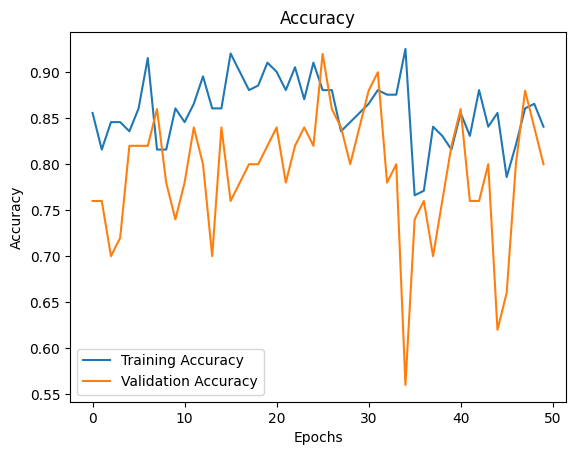

2/2 [==============================] - 6s 160ms/step
Final Training Accuracy: 0.8407959938049316
Final Validation Accuracy: 0.800000011920929
Test Loss: 0.3718310594558716
Test Accuracy: 0.8333333134651184
Precision: 0.8462121212121212
Recall: 0.8333333333333334
F1 Score: 0.8340265399088929
                 precision    recall  f1-score   support

          Covid       1.00      0.96      0.98        26
         Normal       0.81      0.65      0.72        20
Viral Pneumonia       0.68      0.85      0.76        20

       accuracy                           0.83        66
      macro avg       0.83      0.82      0.82        66
   weighted avg       0.85      0.83      0.83        66



In [9]:
test_loss, test_acc = model.evaluate(test_set)
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Get the true labels and predictions for the test set
test_labels = test_set.classes
predictions = model.predict(test_set)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate precision, recall, and F1 score
precision = precision_score(test_labels, predicted_classes, average='weighted')
recall = recall_score(test_labels, predicted_classes, average='weighted')
f1 = f1_score(test_labels, predicted_classes, average='weighted')

print(f"Final Training Accuracy: {final_train_acc}")
print(f"Final Validation Accuracy: {final_val_acc}")
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(classification_report(test_labels, predicted_classes, target_names=test_set.class_indices.keys()))